# Лекция 9. Графики. Mathplotlib

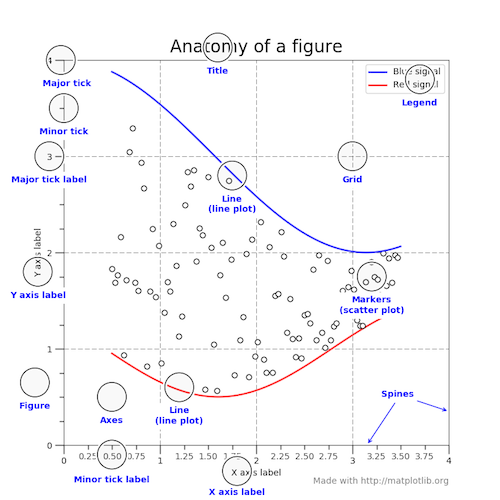

In [ ]:
import matplotlib.pyplot as plt

# Plot

In [ ]:
fig, _ = plt.subplots()
type(fig)

In [ ]:
plt.ylabel('y data')
plt.xlabel('x data')

In [ ]:
# график в который передаются только Y

Y = [1.5, 1, 2, 2.3, 1.7, 3, 1.7, 2.3, 2, 1, 1.5]
plt.plot(Y)

In [ ]:
# график в который передаются и X и Y
X = [1, 1, 5, 5, 2, 2, 1, 1, 4, 4, 2, 2]
Y = [1, 8, 8, 3, 3, 1, 1, 4, 4, 7, 7, 3]

plt.plot(X, Y)

In [ ]:
# настройка осей графика
plt.axis([0, 8, 0, 8])
# [xmin, xmax, ymin, ymax]

plt.plot(X, Y)

In [ ]:
plt.plot(X, Y, 'ro')

In [ ]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'g--', t, t**2, 'bs', t, t**3, 'g^')

# plot принимает сколько угодно большое кол-во наборов по 3 переменных
# X, Y, маркер

### Все маркеры можно найти тут - https://matplotlib.org/3.1.1/api/markers_api.html 

### Все цвета можно найти тут - https://matplotlib.org/3.1.1/api/colors_api.html

# Stackplot

In [ ]:
# генерируем 3 рандомных time series
rng = np.arange(50)
rnd = np.random.randint(0, 20, size=(3, rng.size))
yrs = 1950 + rng

print("Time series yrs\n", yrs)
print("Time series rng\n", rng + rnd)

# создаем объект графика указанного размера X,Y
fig, ax = plt.subplots(figsize=(10, 5))

# передаем лист с X, лист листов с Y и метки для каждого графика
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])

ax.set_title('Совокупный рост долга с течением времени')
ax.legend(loc='upper left')
ax.set_ylabel('Общая задолжность')

# устанавливаем границу по X
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])


# Scatter and Frequencies

In [ ]:
# генерируем рандомные данные
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

# создаем несколько графиков в единую линию
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')


ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
# делаем ось справа
ax2.yaxis.tick_right()

In [ ]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

# точкам можно указывать размеры  s='d'
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')

# Пироги

In [ ]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0.4, 0)  # что и на сколько отордвинуть от центра пирога


fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Вставляем картинки

In [ ]:
import matplotlib.cbook as cbook
with cbook.get_sample_data(r'D:\Share\Python обучение\Лекции\9 графики (mathplotlib)\jackie.jpg') as image_file:
    image = plt.imread(image_file)

fig, (ax) = plt.subplots(nrows=1, ncols=1,figsize=(8, 8))
    
ax.imshow(image)
ax.axis('off')  # убираем оси


# 3d графики

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [ ]:
# Create the data.
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z)
mlab.show()

# Работа с многофигурными графиками

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211) # nrows=2, ncols=1
plt.plot(t1, f(t1), 'go', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

# Приправим текстом

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# гистограмма X, Y, alpha - прозрачность, facecolor - цвет, hist type -  {'bar', 'barstacked', 'step', 'stepfilled'}
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75, histtype='step')


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [ ]:
# применение математическим символов в зашголовках
plt.title(r'$\sigma_i=15$')


In [ ]:
# изменяем подпись оси Х
plt.xlabel('my data', fontsize=14, color='red')

In [ ]:
# Аннотации

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()